In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D3-Pamela/S2/Office_Pamela-S2.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:3600]
test_data = df.iloc[3600:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),12):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+12, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (298, 24, 1)
y_train.shape =  (298, 12)
X_test.shape =  (58, 24, 1)
y_test.shape =  (58, 12)


In [11]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [12]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(12))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 12)                588       
                                                                 
Total params: 5,580
Trainable params: 5,580
Non-trainable params: 0
_________________________________________________________________


In [18]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="MSE")

In [19]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
3/3 [==============================] - 4s 20ms/step - loss: 129.8191
Epoch 2/300
3/3 [==============================] - 0s 17ms/step - loss: 122.8626
Epoch 3/300
3/3 [==============================] - 0s 17ms/step - loss: 118.2546
Epoch 4/300
3/3 [==============================] - 0s 18ms/step - loss: 115.5933
Epoch 5/300
3/3 [==============================] - 0s 29ms/step - loss: 111.5157
Epoch 6/300
3/3 [==============================] - 0s 17ms/step - loss: 107.3013
Epoch 7/300
3/3 [==============================] - 0s 18ms/step - loss: 102.9958
Epoch 8/300
3/3 [==============================] - 0s 17ms/step - loss: 99.1683
Epoch 9/300
3/3 [==============================] - 0s 17ms/step - loss: 96.5501
Epoch 10/300
3/3 [==============================] - 0s 19ms/step - loss: 93.9048
Epoch 11/300
3/3 [==============================] - 0s 19ms/step - loss: 91.2878
Epoch 12/300
3/3 [==============================] - 0s 18ms/step - loss: 89.0239
Epoch 13/300
3/3 [============

In [20]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [22]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 4.413618576750856
RMSE for BiLSTM Model for testing is: 5.155994650681418
MAE for BiLSTM Model for training is: 3.1571038019314703
MAE for BiLSTM Model for testing is: 3.8194797740342517
MAPE for BiLSTM Model for training is: 0.11646823885826074
MAPE for BiLSTM Model for testing is: 0.15387435776176747


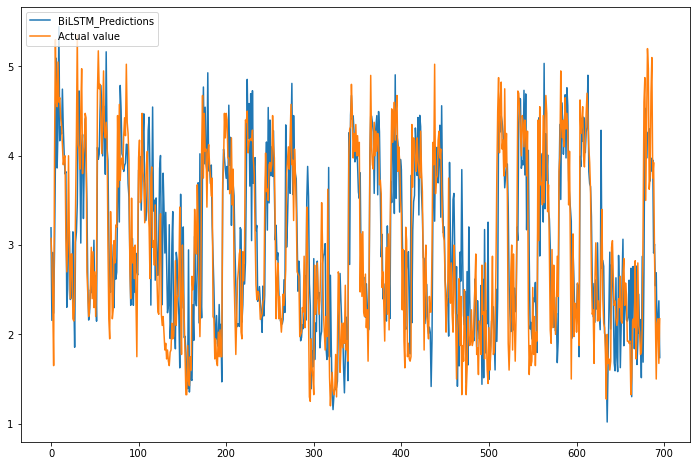

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([3.07500005]), array([3.1934154], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.11841536]), array([0.69313479]), array([-0.56729531]), array([-0.58754718]), array([1.06103396]), array([1.38609767]), array([-0.49221945]), array([0.6868794]), array([0.73976326]), array([-0.84540892]), array([0.48201656]), array([0.10121107]), array([0.10451984]), array([-0.62119818]), array([-0.41609192]), array([-0.05287075]), array([0.20319724]), array([-0.74764013]), array([0.39695072]), array([0.54424429]), array([0.93279266]), array([-0.15373349]), array([0.00938559]), array([0.49419284]), array([0.23996448]), array([-0.97314835]), array([-0.28887582]), array([0.54422474]), array([0.36888838]), array([1.07992005]), array([1.8868506]), array([-0.29670143]), array([-0.65119457]), array([-0.16679954]), array([1.47755527]), array([0.89040852]), array([-0.43798566]), array([0.72788405]), array([0.17184854]), array([0.06093502]), array([0.50534868]), array([-0.7834425]), array([-0.10953164]), array([0.03970838]), array([0.05650759]), array([0.0518651]), array([0.50785732])

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.22057533]), array([-2.52015972]))

In [ ]:
max(d1)-min(d1)

array([4.74073505])

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(350, 346)